In [2]:
import pandas as pd
import numpy as np

# set pandas to show all columns
pd.set_option('display.max_columns', None)

# Number of students
n_students = 1000

# 1. Generating Student Data
np.random.seed(42)  # for reproducibility

ids = np.arange(1, n_students + 1)

# Age: normal distribution, mean = 17, std dev = 1
ages = np.random.normal(17, 1, n_students).astype(int)

# Gender: 50% male, 50% female
genders = np.random.choice(['Male', 'Female'], size=n_students)

# Department: 40% Science, 30% Arts, 30% Commerce
departments = np.random.choice(['Science', 'Arts', 'Commerce'], size=n_students, p=[0.4, 0.3, 0.3])

# Boarding or day: 60% day, 40% boarding
boarding_day = np.random.choice(['Day', 'Boarding'], size=n_students, p=[0.6, 0.4])

# Attendance score: Normal distribution centered at 85%
attendance_scores = np.clip(np.random.normal(85, 10, n_students), 50, 100)

# Computer hours and Lesson hours: random values between 0 to 20, and 0 to 15 hours respectively
computer_hours = np.random.randint(0, 21, n_students)
lesson_hours = np.random.randint(0, 16, n_students)

# 5. Mental Health Score: Skewed towards mild mental health issues (exponentially distributed)
mental_health_scores = np.random.exponential(scale=70, size=n_students).clip(0, 100)

# Extra-curricular participation (binary for each activity)
clubs = {
    'Literary_Debating': np.random.choice([0, 1], size=n_students, p=[0.8, 0.2]),
    'Press_Club': np.random.choice([0, 1], size=n_students, p=[0.9, 0.1]),
    'Music': np.random.choice([0, 1], size=n_students, p=[0.85, 0.15]),
    'Drama': np.random.choice([0, 1], size=n_students, p=[0.85, 0.15]),
    'JETS_Club': np.random.choice([0, 1], size=n_students, p=[0.9, 0.1]),
    'Swimming': np.random.choice([0, 1], size=n_students, p=[0.9, 0.1]),
    'Football': np.random.choice([0, 1], size=n_students, p=[0.7, 0.3]),
    'Chess': np.random.choice([0, 1], size=n_students, p=[0.9, 0.1])
}

# 2. Generating Guardian Data
guardian_income = np.random.normal(loc=200000, scale=100000, size=n_students).clip(50000, 1000000)
guardian_education = np.random.choice(['No Formal Education', 'Primary', 'Secondary', 'Tertiary'], size=n_students, p=[0.1, 0.2, 0.5, 0.2])

# Define possible guardian relationships and their probabilities
guardian_relationships = ['Both Parents', 'Single Mom', 'Single Dad', 'Grandparent', 'Other Relative']
guardian_probabilities = [0.6, 0.2, 0.1, 0.07, 0.03]  # Assumed probabilities

# Generate the "Guardian Relationship" feature
guardian_relationship = np.random.choice(guardian_relationships, size=n_students, p=guardian_probabilities)


# 3. Generating School Data
computer_lab = np.random.choice([0, 1],size = n_students, p=[0.1, 0.9], )  # assume most schools have computer labs
avg_computer_hours = [np.random.randint(1, 6) if lab == 1 else 0 for lab in computer_lab]

# 4. Generating Teacher Data
min_teacher_education = np.random.choice(['Diploma', 'Bachelor\'s', 'Master\'s'],size=n_students, p=[0.1, 0.75, 0.15])
avg_teacher_years_of_experience = np.random.randint(1, 11, size = n_students)

# Compile the data into a DataFrame
data = pd.DataFrame({
    'ID': ids,
    'Age': ages,
    'Gender': genders,
    'Department': departments,
    'Boarding_or_Day': boarding_day,
    'Attendance_Score': attendance_scores,
    'Computer_Hours': computer_hours,
    'Lesson_Hours': lesson_hours,
    'Mental_Health_Score': mental_health_scores,
    'Guardian_Income': guardian_income,
    'Guardian_Education': guardian_education,
    'Guardian_Relationship': guardian_relationship,
    'Computer_Lab': computer_lab,
    'Avg_Computer_Hours': avg_computer_hours,
    'Min_Teacher_Education': min_teacher_education,
    'Avg_Teacher_Years_of_Experience': avg_teacher_years_of_experience,
   # **clubs  # Add the extra-curricular data
})

display(data.head())


,ID,Age,Gender,Department,Boarding_or_Day,Attendance_Score,Computer_Hours,Lesson_Hours,Mental_Health_Score,Guardian_Income,Guardian_Education,Guardian_Relationship,Computer_Lab,Avg_Computer_Hours,Min_Teacher_Education,Avg_Teacher_Years_of_Experience
0,1,17,Male,Commerce,Day,75.480815,6,1,73.033038,249624.856625,Tertiary,Single Mom,1,2,Master's,5
1,2,16,Female,Science,Boarding,85.774805,19,15,2.081607,348283.286639,Primary,Single Mom,1,5,Bachelor's,4
2,3,17,Male,Science,Boarding,87.577525,6,1,67.382298,270478.944244,Secondary,Grandparent,1,5,Bachelor's,7
3,4,18,Female,Science,Day,72.582394,8,12,49.864366,280954.188825,Primary,Other Relative,1,2,Bachelor's,8
4,5,16,Male,Commerce,Boarding,88.341764,0,13,55.237481,229401.639931,Tertiary,Both Parents,1,5,Bachelor's,5


In [3]:

# Feature weights (updated to include additional features)
weights = {
    'Attendance_Score': 0.25,
    'Computer_Hours': 0.1,
    'Lesson_Hours': 0.15,
    'Mental_Health_Score': 0.1,
    'Guardian_Income': 0.1,
    'Guardian_Education': 0.05,
    'Guardian_Relationship': 0.05,
    'Teacher_Years_Experience': 0.1,
    'Boarding_or_Day': 0.1
}

# Normalize the continuous features to 0-1 range (e.g., Attendance, Computer_Hours)
data['Attendance_Score_Norm'] = data['Attendance_Score'] / 100
data['Computer_Hours_Norm'] = data['Computer_Hours'] / data['Computer_Hours'].max()
data['Lesson_Hours_Norm'] = data['Lesson_Hours'] / data['Lesson_Hours'].max()
data['Mental_Health_Score_Norm'] = data['Mental_Health_Score'] / 100
data['Guardian_Income_Norm'] = data['Guardian_Income'] / data['Guardian_Income'].max()
data['Teacher_Experience_Norm'] = data['Avg_Teacher_Years_of_Experience'] / 10  # assuming 10 is max experience

# Handling categorical features by assigning numeric scores
education_map = {
    'No Formal Education': 0.0,
    'Primary': 0.25,
    'Secondary': 0.5,
    'Tertiary': 1.0
}
data['Guardian_Education_Score'] = data['Guardian_Education'].map(education_map)

guardian_relationship_map = {
    'Both Parents': 1.0,
    'Single Mom': 0.7,
    'Single Dad': 0.7,
    'Grandparent': 0.5,
    'Other Relative': 0.3
}
data['Guardian_Relationship_Score'] = data['Guardian_Relationship'].map(guardian_relationship_map)

boarding_map = {
    'Boarding': 1.0,
    'Day': 0.7
}
data['Boarding_Score'] = data['Boarding_or_Day'].map(boarding_map)

# Calculate the pass likelihood score as a weighted sum of normalized features
data['Pass_Likelihood'] = (
    weights['Attendance_Score'] * data['Attendance_Score_Norm'] +
    weights['Computer_Hours'] * data['Computer_Hours_Norm'] +
    weights['Lesson_Hours'] * data['Lesson_Hours_Norm'] +
    weights['Mental_Health_Score'] * data['Mental_Health_Score_Norm'] +
    weights['Guardian_Income'] * data['Guardian_Income_Norm'] +
    weights['Guardian_Education'] * data['Guardian_Education_Score'] +
    weights['Guardian_Relationship'] * data['Guardian_Relationship_Score'] +
    weights['Teacher_Years_Experience'] * data['Teacher_Experience_Norm'] +
    weights['Boarding_or_Day'] * data['Boarding_Score']
)

# Add realistic noise based on a normal distribution to simulate uncertainty
data['Pass_Likelihood'] += np.random.normal(0, 0.02, len(data))

# Add exponentially distributed noise to model potential real-world challenges
exponential_noise = np.random.exponential(scale=0.02, size=len(data))
data['Pass_Likelihood'] -= exponential_noise

# Clip values to ensure Pass_Likelihood stays within a valid range [0, 1]
data['Pass_Likelihood'] = np.clip(data['Pass_Likelihood'], 0, 1)

# Set a threshold to determine whether a student passes or fails
threshold = 0.6  # Adjust this threshold for stricter or easier passing criteria
data['Pass/Fail'] = np.where(data['Pass_Likelihood'] >= threshold, 'Pass', 'Fail')

# drop the normalized and score features
data.drop(columns=['Attendance_Score_Norm', 'Computer_Hours_Norm', 'Lesson_Hours_Norm', 'Mental_Health_Score_Norm', 'Guardian_Income_Norm', 'Teacher_Experience_Norm', 'Guardian_Education_Score', 'Guardian_Relationship_Score','Boarding_Score'], inplace=True)

# Display the first few rows of the dataset
display(data[['Attendance_Score', 'Computer_Hours', 'Lesson_Hours', 'Mental_Health_Score', 'Guardian_Income', 'Pass_Likelihood', 'Pass/Fail', 'Guardian_Relationship', 'Avg_Teacher_Years_of_Experience', 'Boarding_or_Day']].head())

,Attendance_Score,Computer_Hours,Lesson_Hours,Mental_Health_Score,Guardian_Income,Pass_Likelihood,Pass/Fail,Guardian_Relationship,Avg_Teacher_Years_of_Experience,Boarding_or_Day
0,75.480815,6,1,73.033038,249624.856625,0.517305,Fail,Single Mom,5,Day
1,85.774805,19,15,2.081607,348283.286639,0.689592,Pass,Single Mom,4,Boarding
2,87.577525,6,1,67.382298,270478.944244,0.583619,Fail,Grandparent,7,Boarding
3,72.582394,8,12,49.864366,280954.188825,0.607252,Pass,Other Relative,8,Day
4,88.341764,0,13,55.237481,229401.639931,0.653913,Pass,Both Parents,5,Boarding


In [4]:
data.to_csv('student_data.csv', index=False)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Prepare the data for modeling
# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['Gender', 'Department', 'Boarding_or_Day',
                                             'Guardian_Education', 'Guardian_Relationship',
                                             'Min_Teacher_Education'])

# normalize continuous features with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cont_cols = ['Age', 'Attendance_Score', 'Computer_Hours', 'Lesson_Hours', 'Mental_Health_Score', 'Guardian_Income', 'Avg_Teacher_Years_of_Experience']
data_encoded[cont_cols] = scaler.fit_transform(data_encoded[cont_cols])

# Define features and target variable
X = data_encoded.drop(['ID', 'Pass/Fail', 'Pass_Likelihood'], axis=1)
y = data_encoded['Pass/Fail']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression model: {accuracy:.2f}')

Accuracy of Logistic Regression model: 0.90


In [6]:
import pickle

with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(model, file)
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

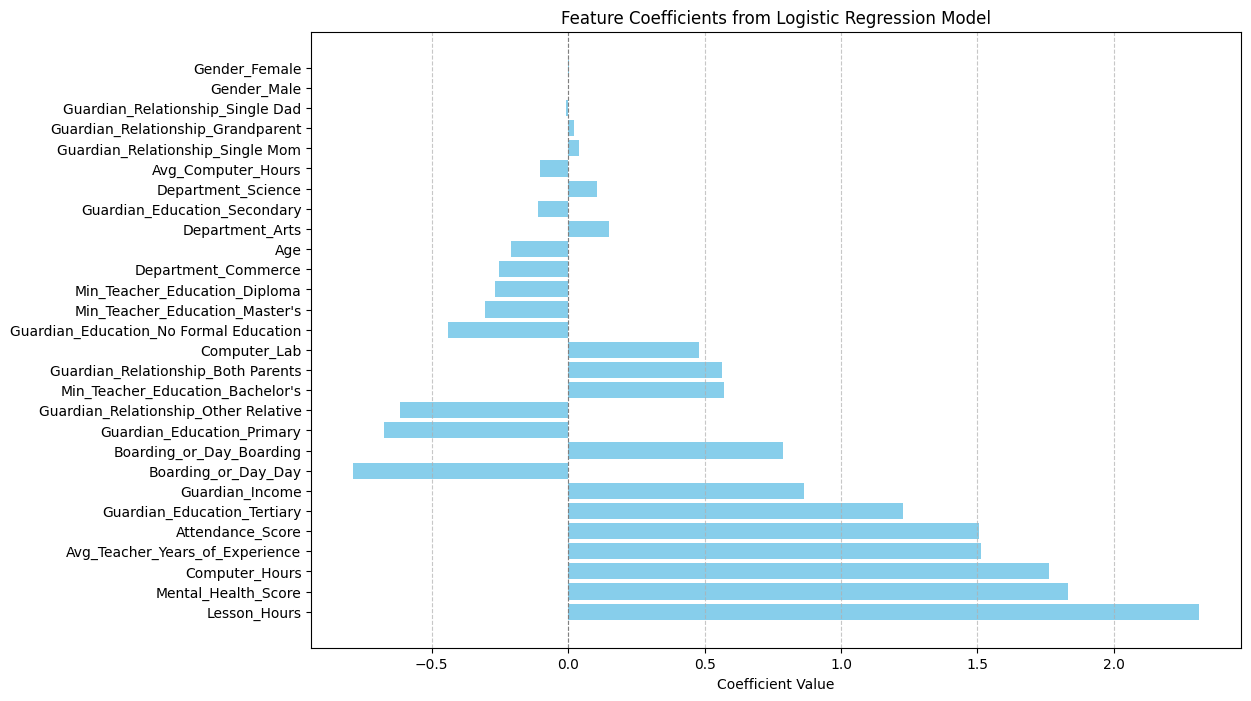

In [7]:
import matplotlib.pyplot as plt

# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Get feature names
feature_names = X.columns

# Create a DataFrame for better visualization
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Sort the coefficients by their absolute values
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Coefficients from Logistic Regression Model')
plt.axvline(0, color='grey', lw=0.8, linestyle='--')  # Add a vertical line at x=0
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [6]:
# train decision tree model

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt = DecisionTreeClassifier(random_state=42, max_depth = 3)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree model: {accuracy:.2f}')

Accuracy of Decision Tree model: 0.77


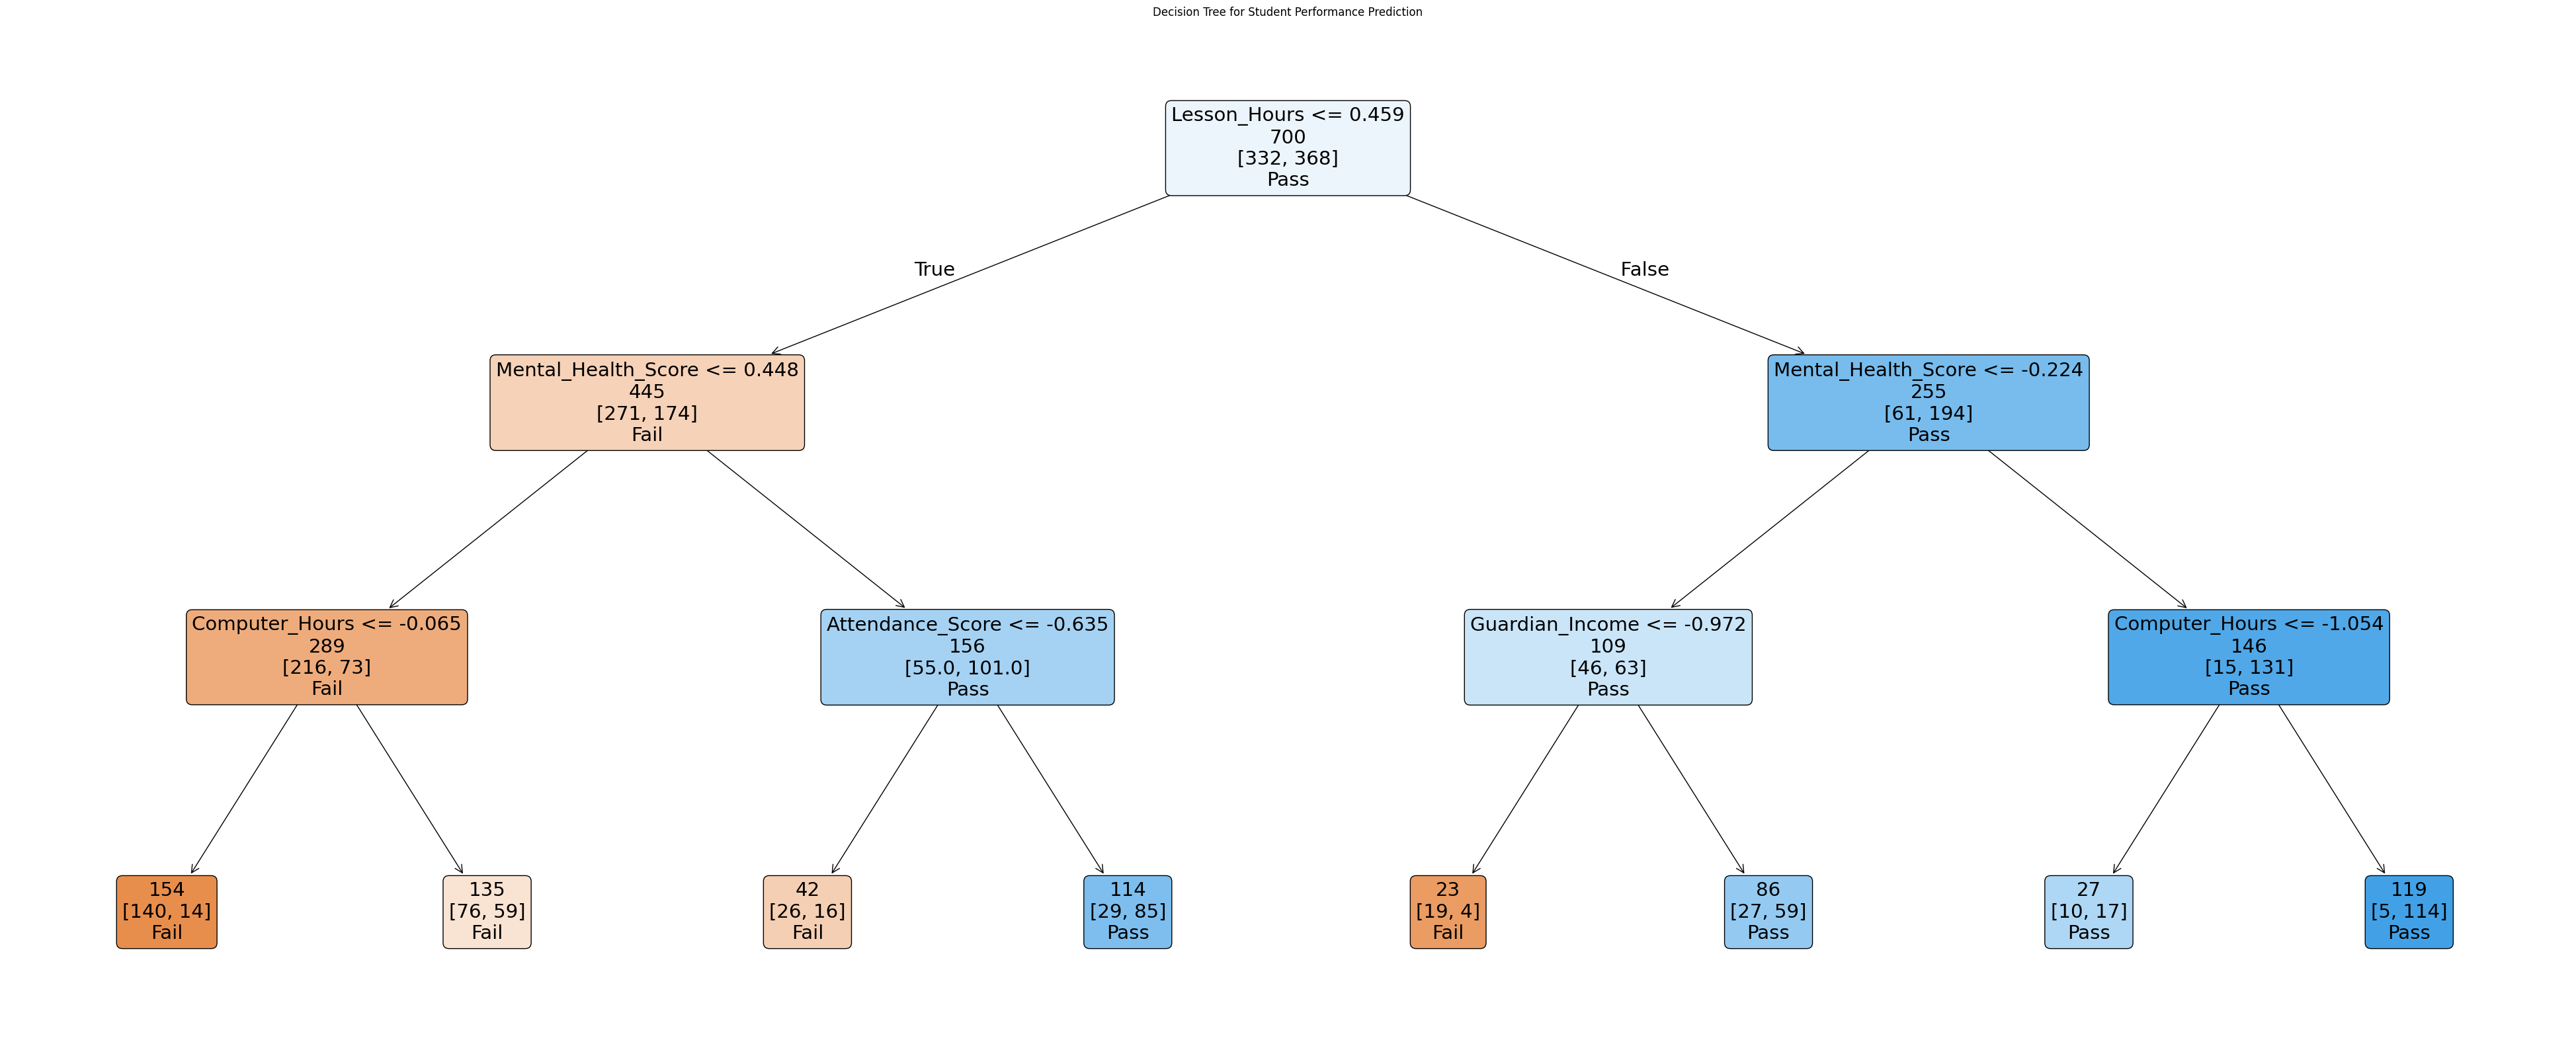

In [7]:
# Visualize the decision tree
plt.figure(figsize=(50,20))
plot_tree(dt, feature_names=X.columns, class_names=['Fail', 'Pass'], filled=True, rounded=True,label = 'none', impurity= False )
plt.title("Decision Tree for Student Performance Prediction")
plt.show()